# ML Analysis

## Imports

- sklearn
- numpy
- matplotlib

In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

## Reading Data into Datasets

To make storing and using our data more efficient, and because `sklearn` uses numpy, we will load our data into numpy arrays instead of regular python arrays. Luckily, this is pretty easily done using the `loadtext` numpy function.

Let's create a utility function so we can easily grab $X$ and $y$.

In [4]:
BATCH_DIRNAME = 'batches'

def get_batch(batch: str) -> tuple[np.array, np.array]:
    X = np.loadtxt(f'{BATCH_DIRNAME}\\{batch}.csv', delimiter=',', usecols=(1,2,3,4,5,6,7,8))
    y = np.loadtxt(f'{BATCH_DIRNAME}\\{batch}.csv', delimiter=',', usecols=(9))
    return X, y

In [3]:
X, y = get_batch('all')
print('first line:')
print('features:', X[0], 'label:', y[0])
print('\nlast line:')
print('features:', X[-1], 'label:', y[-1])
print('\nfourth last line:')
print('features:', X[-4], 'label:', y[-4])

assert(np.equal(X[0], [1210.4049263859292,1213.0286378561145,1171.0570931861503,1252.43329795279,1311.7870914135804,1134.0426266972086,1224.2018975917074,1174.2964388851024]).all())
assert(y[0] == 0)

assert(np.equal(X[-1], [1224.534491011658,1229.0108211177903,1192.2524591196284,1155.446368279509,1251.9748607754825,1309.5550844188176,1161.8690622017175,1198.935412539822]).all())
assert(y[-1] == 0)

assert(np.equal(X[-4], [1247.5890092001796,1148.1204780630078,1339.2792588042014,1325.4846697556172,1441.7604412430378,1219.1212017838004,1328.8421375673797,1195.6498424086785]).all())
assert(y[-4] == 1)

print("\nchecks passed!")


first line:
features: [1210.40492639 1213.02863786 1171.05709319 1252.43329795 1311.78709141
 1134.0426267  1224.20189759 1174.29643889] label: 0.0

last line:
features: [1224.53449101 1229.01082112 1192.25245912 1155.44636828 1251.97486078
 1309.55508442 1161.8690622  1198.93541254] label: 0.0

fourth last line:
features: [1247.5890092  1148.12047806 1339.2792588  1325.48466976 1441.76044124
 1219.12120178 1328.84213757 1195.64984241] label: 1.0

checks passed!


## Logistic Regression

The first algorithm we will use to analyze the data is using logistic regression.

In [6]:
from sklearn.linear_model import LogisticRegression
X, y = get_batch('all')
clf = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2').fit(X, y)

In [5]:
print(clf.predict(X[:5, :]))
print(clf.predict_proba(X[:5, :]))

print()

print(clf.predict(X[-5:, :]))
print(clf.predict_proba(X[-5:, :]))

print()
print(f'score: {clf.score(X,y):.2%}')

[1. 0. 1. 0. 1.]
[[0.48381461 0.51618539]
 [0.63627676 0.36372324]
 [0.27487315 0.72512685]
 [0.58761644 0.41238356]
 [0.35874983 0.64125017]]

[1. 1. 0. 1. 1.]
[[0.24402684 0.75597316]
 [0.32953269 0.67046731]
 [0.8758844  0.1241156 ]
 [0.37782285 0.62217715]
 [0.3514085  0.6485915 ]]

score: 71.95%


In [6]:
batches = ['season_1', 'season_2', 'season_3']

for batch in batches:
    X1, y1 = get_batch('season_1')
    clf1 = LogisticRegression(solver='liblinear', max_iter=1000).fit(X1, y1)
    print(f'confidence score for {batch}: {clf1.score(X1, y1):.2%}')

confidence score for season_1: 75.37%
confidence score for season_2: 75.37%
confidence score for season_3: 75.37%


In [7]:
print(clf.predict_proba([[1500,1500,1500,1500,1500,1500,1500,1500],
                         [1100,1300,1700,1900,1500,1500,1500,1500],
                         [1500,1500,1500,1500,1100,1300,1700,1900],
                         [1400,1400,1800,1400,1500,1500,1500,1500],
                         [1500,1500,1500,1500,1400,1400,1800,1400]]))

[[0.47893267 0.52106733]
 [0.43884193 0.56115807]
 [0.45837633 0.54162367]
 [0.49712323 0.50287677]
 [0.42700827 0.57299173]]


The above findings give us some problems. It seems like the algorithm has a bias for the bravo team. Any change from the perfect even match (all equal players), seems to increase the chance of bravo winning. This is likely due to some bias from our data.

In [8]:
_, y = get_batch('all')
print(f"{np.count_nonzero(y)/len(y):.2%} of matches result in a bravo win")

55.38% of matches result in a bravo win


See "reducing bravo bias" in preprocessing.ipynb to see my strategy for reducing bias. In this new dataset, the bravo bias should disappear.

In [9]:
_, y = get_batch('all_mirrored')
print(f"{np.count_nonzero(y)/len(y):.2%} of matches result in a bravo win")

50.00% of matches result in a bravo win


Let's see if this improved our bravo bias.

In [22]:
X, y = get_batch('all_mirrored')
clf = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2').fit(X, y)

print(f"Accuracy: {clf.score(X, y):.2%}")

Accuracy: 71.80%


In [23]:
print(clf.predict_proba([[1500,1500,1500,1500,1500,1500,1500,1500],
                         [1100,1300,1700,1900,1500,1500,1500,1500],
                         [1500,1500,1500,1500,1100,1300,1700,1900],
                         [1400,1400,1800,1400,1500,1500,1500,1500],
                         [1500,1500,1500,1500,1400,1400,1800,1400]]))

[[0.5        0.5       ]
 [0.49401531 0.50598469]
 [0.50598469 0.49401531]
 [0.53615065 0.46384935]
 [0.46384935 0.53615065]]


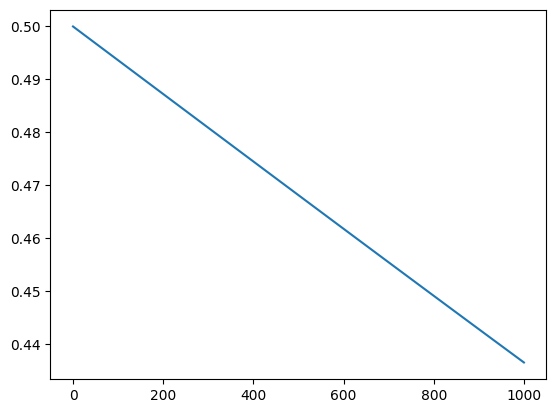

In [10]:
x = np.linspace(0, 1000, 100)
def even_spread(dist):
    return [1500-dist, 1500-(dist/2), 1500+(dist/2), 1500+dist] + [1500] * 4

fig, ax = plt.subplots()
# clf.predict_proba(even_spread(x))
y = [even_spread(v) for v in x]
# print(clf.predict_proba(y)[:,0])
ax.plot(x,clf.predict_proba([even_spread(v) for v in x])[:,0])
plt.show()

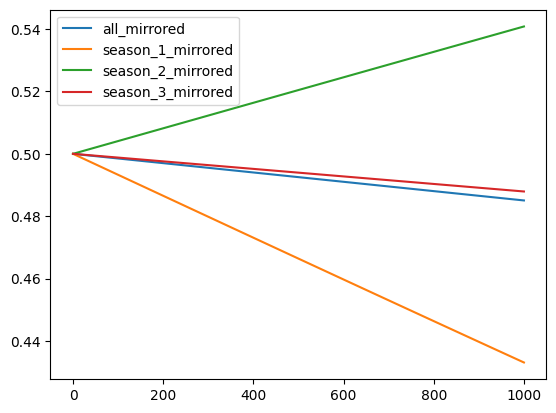

In [11]:
# x is a numpy array of all the x values on the graph
# feature_func converts x values to an array of features
# batches are the list of batch names to be graphed
def gen_graphs(x, feature_func, batches):
    fig, ax = plt.subplots()
    for batch in batches:
        X, y = get_batch(batch)
        clf = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2').fit(X, y)
        plot_y = clf.predict_proba([feature_func(v) for v in x])[:, 0]
        ax.plot(x, plot_y, label=batch)
    ax.legend()
    plt.show()

gen_graphs(np.linspace(0, 1000, 100), even_spread, ['all_mirrored', 'season_1_mirrored',
                                                    'season_2_mirrored', 'season_3_mirrored'])        

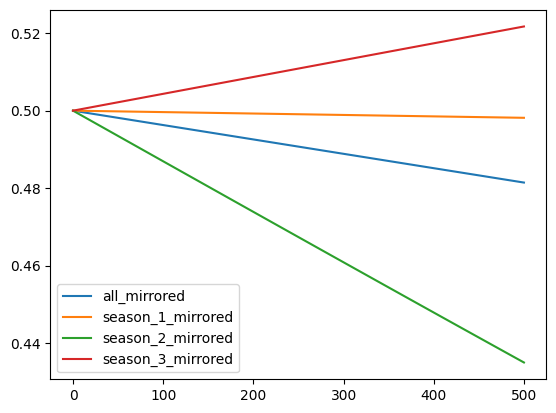

In [14]:
def team_with_carry(x):
    r = x/3
    return [1500+x, 1500-r, 1500-r, 1500-r] + [1500] * 4

gen_graphs(np.linspace(0, 500, 100), team_with_carry,
           ['all_mirrored', 'season_1_mirrored', 'season_2_mirrored',
            'season_3_mirrored'])

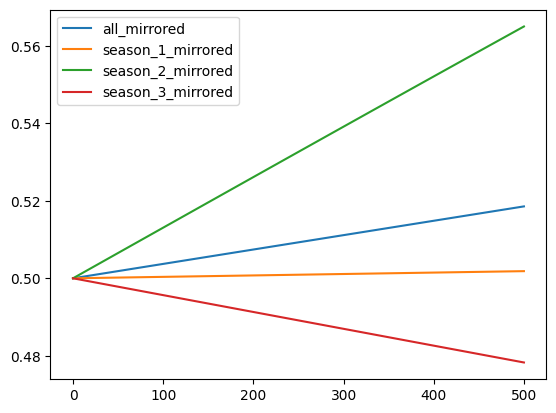

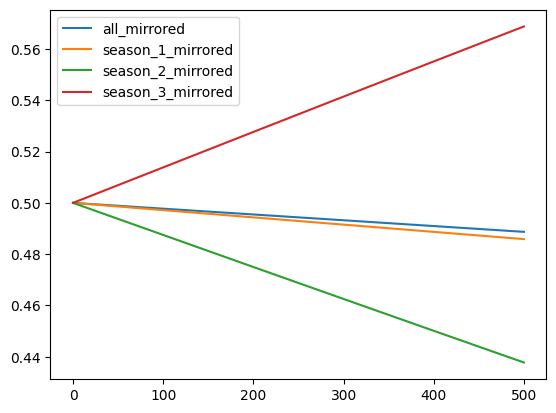

In [18]:
def team_with_dead_weight(x):
    r = x/3
    return [1500-x,1500+r,1500+r,1500+r] + [1500] * 4

def team_with_dead_weight_2(x):
    r = x/3
    return [1500+r,1500-x,1500+r,1500+r] + [1500] * 4

gen_graphs(np.linspace(0, 500, 100), team_with_dead_weight,
            ['all_mirrored', 'season_1_mirrored', 'season_2_mirrored',
            'season_3_mirrored'])
gen_graphs(np.linspace(0, 500, 100), team_with_dead_weight_2,
            ['all_mirrored', 'season_1_mirrored', 'season_2_mirrored',
            'season_3_mirrored'])

Player slot bias.

In [21]:
print(clf.predict_proba([[2000,1500,1500,1500,2000,1500,1500,1500],
                         [1500,2000,1500,1500,2000,1500,1500,1500],
                         [1500,1500,2000,1500,2000,1500,1500,1500],
                         [1500,1500,1500,2000,2000,1500,1500,1500],
                         [1500,2000,1500,1500,1500,1500,2000,1500]]))

[[0.5        0.5       ]
 [0.51197834 0.48802166]
 [0.54235107 0.45764893]
 [0.45125048 0.54874952]
 [0.46956551 0.53043449]]


In [7]:
X, y = get_batch('all_rmirrored')
clf = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2').fit(X, y)

print(f"Accuracy: {clf.score(X, y):.2%}")

print(clf.predict_proba([[2000,1500,1500,1500,2000,1500,1500,1500],
                         [1500,2000,1500,1500,2000,1500,1500,1500],
                         [1500,1500,2000,1500,2000,1500,1500,1500],
                         [1500,1500,1500,2000,2000,1500,1500,1500],
                         [1500,2000,1500,1500,1500,1500,2000,1500]]))

Accuracy: 71.90%
[[0.5        0.5       ]
 [0.52054105 0.47945895]
 [0.4700497  0.5299503 ]
 [0.49333344 0.50666656]
 [0.5503674  0.4496326 ]]


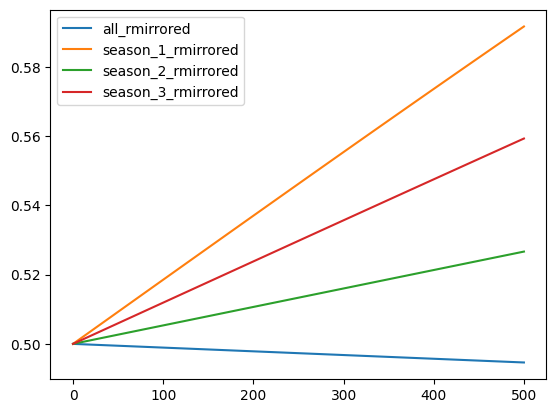

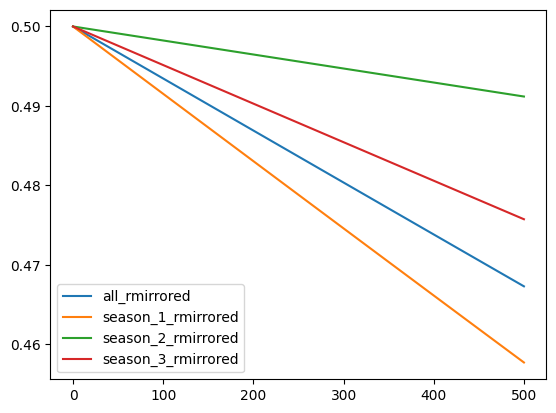

In [12]:
def team_with_dead_weight(x):
    r = x/3
    return [1500-x,1500+r,1500+r,1500+r] + [1500] * 4

def team_with_dead_weight_2(x):
    r = x/3
    return [1500+r,1500-x,1500+r,1500+r] + [1500] * 4

gen_graphs(np.linspace(0, 500, 100), team_with_dead_weight,
            ['all_rmirrored', 'season_1_rmirrored', 'season_2_rmirrored',
            'season_3_rmirrored'])
gen_graphs(np.linspace(0, 500, 100), team_with_dead_weight_2,
            ['all_rmirrored', 'season_1_rmirrored', 'season_2_rmirrored',
            'season_3_rmirrored'])

In [13]:
X, y = get_batch('all_k5')
clf = LogisticRegression(solver='liblinear', max_iter=1000, penalty='l2').fit(X, y)

print(f"Accuracy: {clf.score(X, y):.2%}")

print(clf.predict_proba([[2000,1500,1500,1500,2000,1500,1500,1500],
                         [1500,2000,1500,1500,2000,1500,1500,1500],
                         [1500,1500,2000,1500,2000,1500,1500,1500],
                         [1500,1500,1500,2000,2000,1500,1500,1500],
                         [1500,2000,1500,1500,1500,1500,2000,1500]]))

Accuracy: 71.88%
[[0.49999999 0.50000001]
 [0.47642882 0.52357118]
 [0.4948848  0.5051152 ]
 [0.51686106 0.48313894]
 [0.4815351  0.5184649 ]]
